In [7]:
import pandas as pd
import numpy as np
import os
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [8]:
url = "https://raw.githubusercontent.com/solaojp/Machine-learning_models/master/diabetes.csv"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [10]:
x = df[feature_cols]
y = df.Outcome

In [11]:
#Sploiting data into train and test variable
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [13]:
#Building a decision tree model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [14]:
#Model accuracy
print("Accuracy",metrics.accuracy_score(y_test, y_pred))

Accuracy 0.6796536796536796


67% is quite good for accuracy. We can fine tune the model further for greater accuracy.
for now lest plot of decision tree 
#pip install graphviz
#pip install pydotplus

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

In [16]:
from sklearn.tree import export_graphviz   # convert decision tree classifier into dot file
import pydotplus                           #convert dot file into png display form
from sklearn.externals.six import StringIO  
from IPython.display import Image  

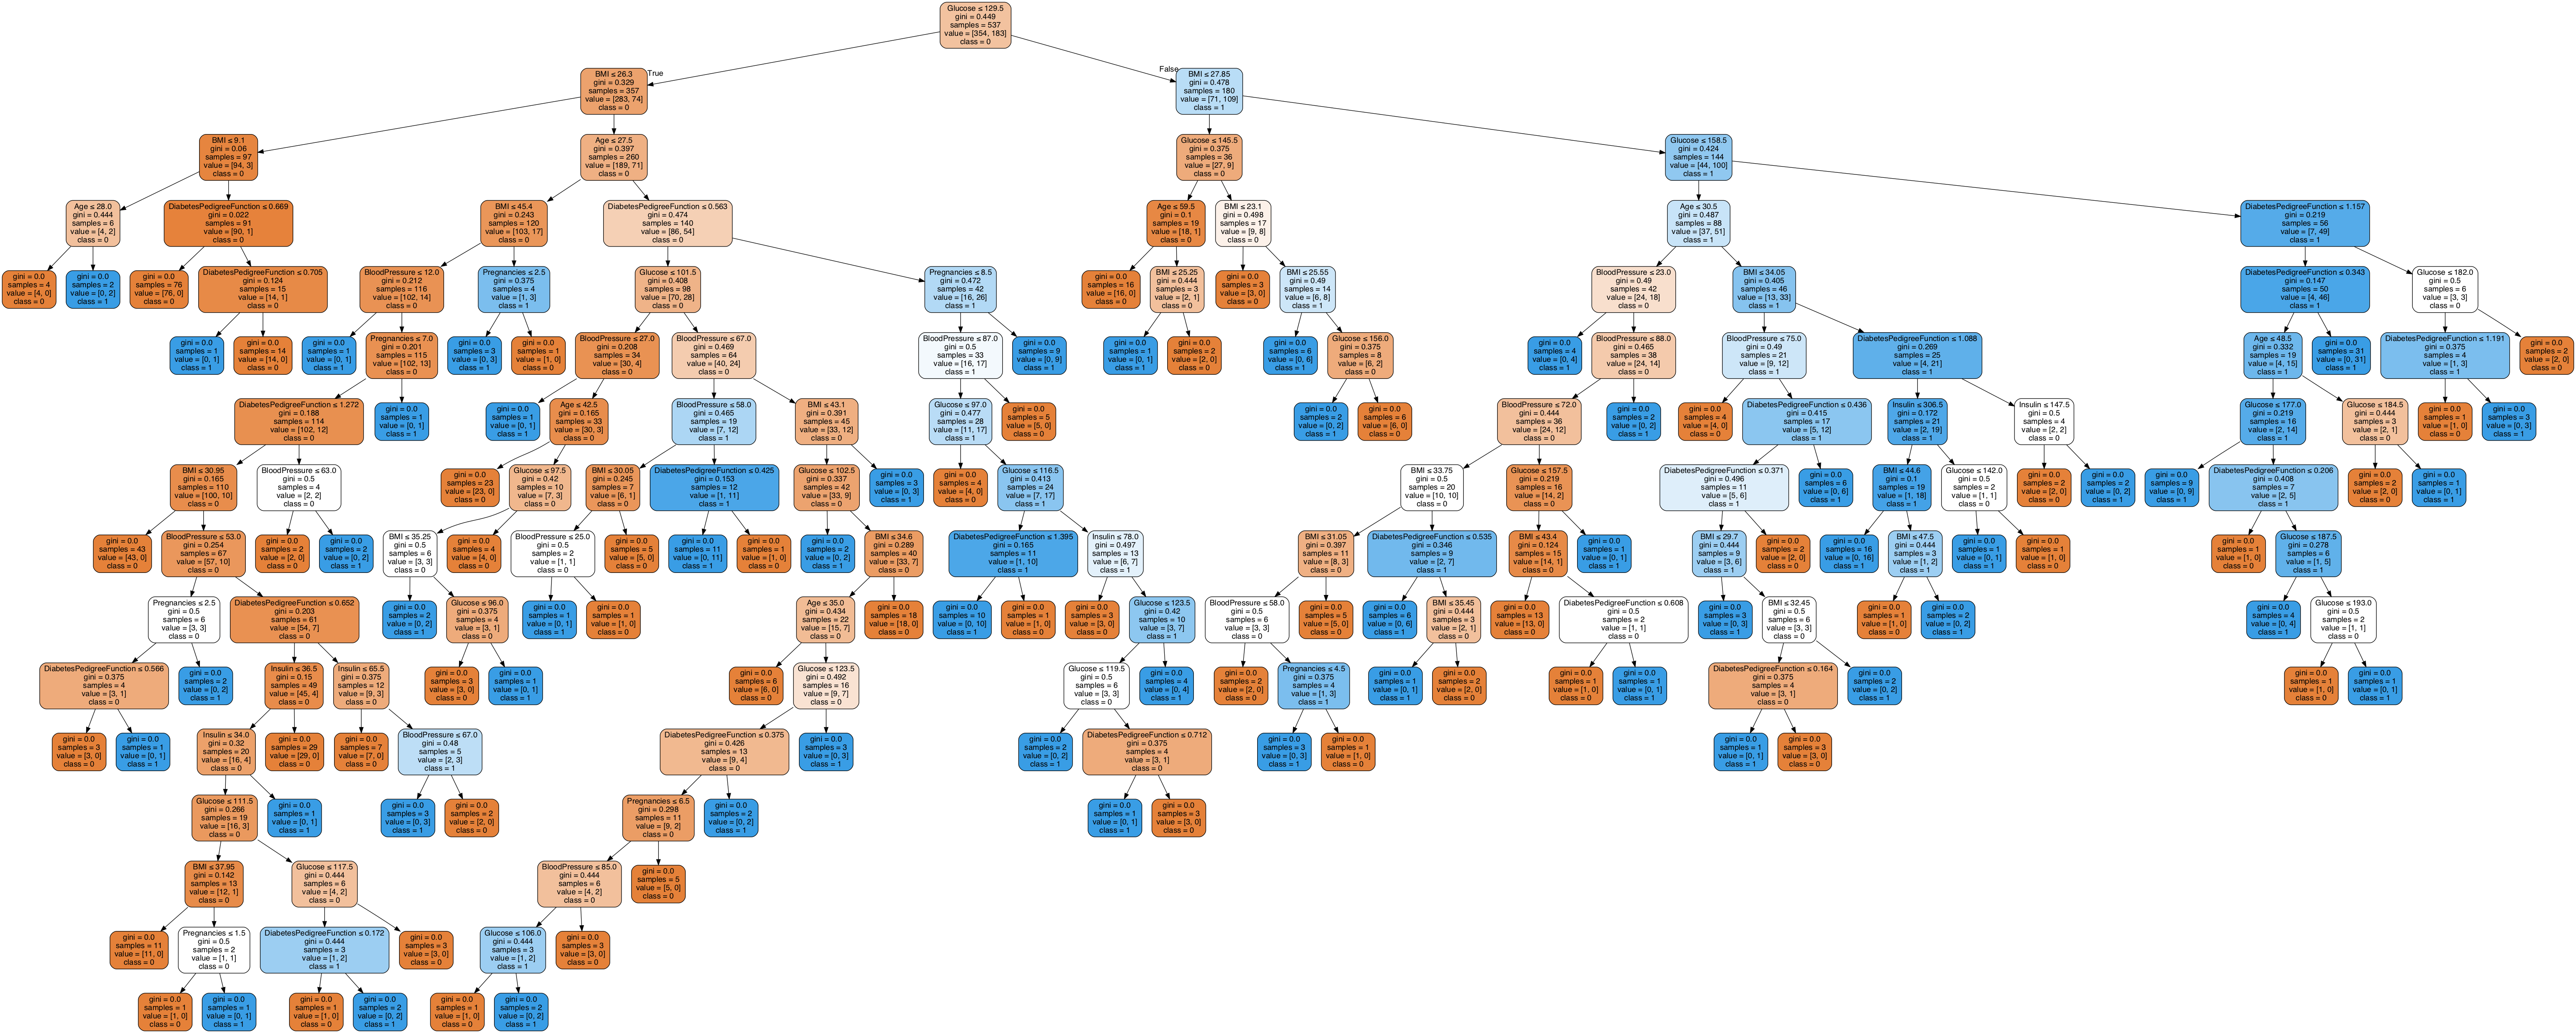

In [17]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.here the graph is unpruned and can not be used for analysis.

#We optimize the performance of decision trees with Pruning
#Optimizing Decession tree performance 

criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy

In [22]:
clf = DecisionTreeClassifier(criterion = "gini",max_depth = 3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [23]:
print("Accuracy",metrics.accuracy_score(y_test,y_pred))

Accuracy 0.7575757575757576


Our accuracy for model increased from 67% to 77%

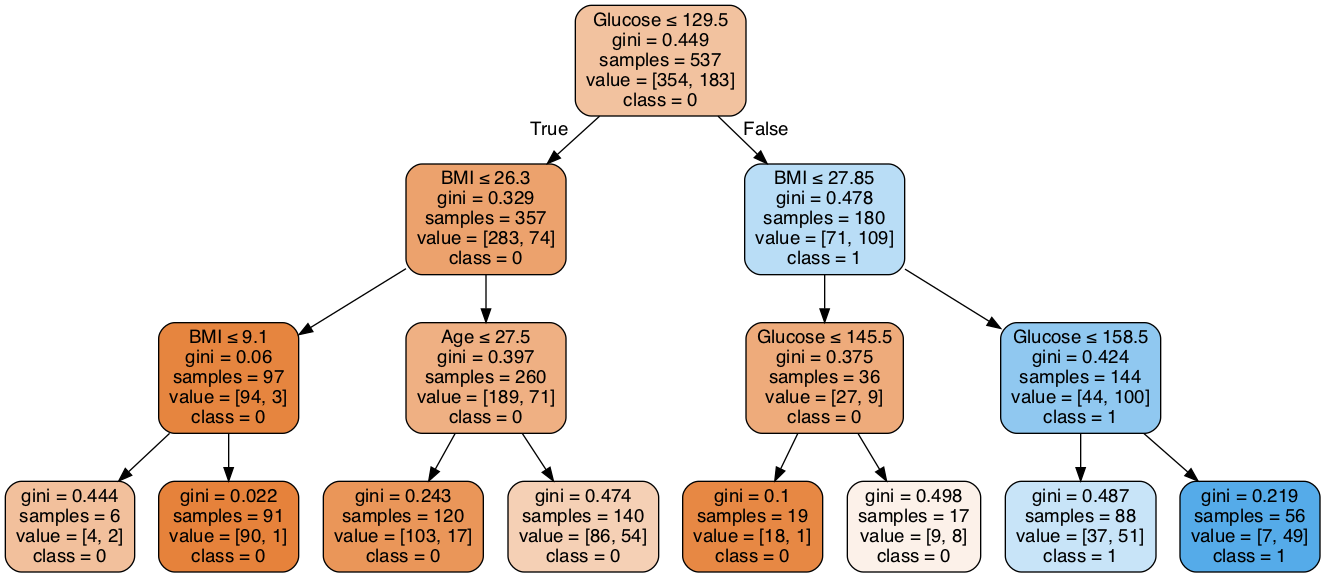

In [24]:
#visualization
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Pros and cons
Decision trees are easy to interpret and visualize.
It can easily capture Non-linear patterns.
It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
It can be used for feature engineering such as predicting missing values, suitable for variable selection.
The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.
CONS
Sensitive to noisy data. It can overfit noisy data.
The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.(Source)


In [25]:
clf1 = RandomForestClassifier()
clf1 = clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_test,y_pred))

Accuracy 0.7835497835497836


/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
